<center><h1>Supplement S1 of</h1><h2>Categorical Perception of Fear and Anger Expressions in Whole,<br>Masked and Composite Faces.</h2></center>
<br>

# Get Data for Experiment 1 (Masking)

This file contains the full code to extract all information from the original logfiles, count the responses and create a table with the main results, which can be used in later analyses.

## Import Libraries

In [1]:
import fnmatch
import os
import sys
import csv

import numpy as np

import pandas as pd
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 1000)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Get List of Subject Files

In [2]:
def getsubject(whichfolder, whichexperiment):
    #os.chdir(whichfolder)
    pList = []
    for fileName in os.listdir(whichfolder):
        if fnmatch.fnmatch(fileName, whichexperiment):
            pList.append(whichfolder+fileName)
    return pList

In [3]:
pList = getsubject("./data/exp1/", "*.log")
pList.sort()

Example:

In [4]:
pList[:10]

['./data/exp1/01-Vp001_ParaMasked_pt1.log',
 './data/exp1/01-Vp001_ParaMasked_pt2.log',
 './data/exp1/02-Vp002_ParaMasked_pt1.log',
 './data/exp1/02-Vp002_ParaMasked_pt2.log',
 './data/exp1/03-Vp003_ParaMasked_pt1.log',
 './data/exp1/03-Vp003_ParaMasked_pt2.log',
 './data/exp1/04-Vp004_ParaMasked_pt1.log',
 './data/exp1/04-Vp004_ParaMasked_pt2.log',
 './data/exp1/05-Vp005_ParaMasked_pt1.log',
 './data/exp1/05-Vp005_ParaMasked_pt2.log']

## Compute Number of hits

In [5]:
def howmany(d):
    i = 0.
    for e in d:
        if d[e] == "hit":
            i = i + 1
    return i/len(d)

## Find Entries and count # of hits for each condition

In the logfiles, the masking conditions have a legacy naming, which goes as follows:
- whole face: 'orig'
- upper half: 'nom' (no mouth)
- lower half: 'noe' (no eyes)

In [6]:
def findentry_sub(cond,grade,filename):
    tempDict = {}
    fileContent = open(filename,'r')
    origArray = ["*_00_orig*", "*_01_orig*", "*_02_orig*", "*_03_orig*", "*_04_orig*", "*_05_orig*", "*_06_orig*", "*_07_orig*", "*_08_orig*", "*_09_orig*", "*_10_orig*"]
    noeArray = ["*_00_noe*", "*_01_noe*", "*_02_noe*", "*_03_noe*", "*_04_noe*", "*_05_noe*", "*_06_noe*", "*_07_noe*", "*_08_noe*", "*_09_noe*", "*_10_noe*"]
    nomArray = ["*_00_nom*", "*_01_nom*", "*_02_nom*", "*_03_nom*", "*_04_nom*", "*_05_nom*", "*_06_nom*", "*_07_nom*", "*_08_nom*", "*_09_nom*", "*_10_nom*"]
    condArray = [origArray, noeArray, nomArray]

    for entry in fileContent:
            if fnmatch.fnmatch(entry, condArray[cond][grade]) == True:
                thisEntry = entry.split()
                picName = thisEntry[3][:-4]
                response = thisEntry[-2]
                tempDict[picName] = response

    return howmany(tempDict)

Example (for one condition, one morph and one logfile)

In [7]:
findentry_sub(0,0,pList[0])

0.1

## For all morphing grades in one condition

In [8]:
def get_cond(cond,filename):
    d = {}
    for i in np.arange(0,11):
        if i < 10:
            d["m0"+str(i)] = findentry_sub(cond,i,filename)
        else:
            d["m"+str(i)] = findentry_sub(cond,i,filename)
    return d

Example:

In [9]:
get_cond(0,pList[0])

{'m00': 0.1,
 'm01': 0.15,
 'm02': 0.25,
 'm03': 0.25,
 'm04': 0.35,
 'm05': 0.6,
 'm06': 0.65,
 'm07': 0.9,
 'm08': 1.0,
 'm09': 1.0,
 'm10': 1.0}

## For all Conditions in one experiment part

In [10]:
def get_pt(filename):
    d = {}
    for i in np.arange(0,3):
        d[i] = get_cond(i,filename)
    return d

Example:

In [11]:
get_pt(pList[0])

{0: {'m00': 0.1,
  'm01': 0.15,
  'm02': 0.25,
  'm03': 0.25,
  'm04': 0.35,
  'm05': 0.6,
  'm06': 0.65,
  'm07': 0.9,
  'm08': 1.0,
  'm09': 1.0,
  'm10': 1.0},
 1: {'m00': 0.2,
  'm01': 0.4,
  'm02': 0.35,
  'm03': 0.4,
  'm04': 0.45,
  'm05': 0.5,
  'm06': 0.8,
  'm07': 0.75,
  'm08': 0.85,
  'm09': 0.7,
  'm10': 0.75},
 2: {'m00': 0.15,
  'm01': 0.0,
  'm02': 0.2,
  'm03': 0.2,
  'm04': 0.4,
  'm05': 0.3,
  'm06': 0.5,
  'm07': 0.85,
  'm08': 0.85,
  'm09': 1.0,
  'm10': 0.95}}

In [12]:
def get_ident_parts(pList,p):
    pt1 = get_pt(pList[p])
    pt2 = get_pt(pList[p+1])
    return pt1,pt2

In [13]:
def make_ident_df(pList,p):
    # each subject has two logfiles which follow each other
    # in the file list
    pt1_df = pd.DataFrame(get_ident_parts(pList,p)[0])
    pt2_df = pd.DataFrame(get_ident_parts(pList,p)[1])
    cond_names = ["whole","mouth","eyes"]
    pt1_df.columns = cond_names
    pt2_df.columns = cond_names
    avg_df = (pt1_df + pt2_df)/2
    return pt1_df, pt2_df, avg_df

Example:

In [14]:
make_ident_df(pList,0)[2]

,whole,mouth,eyes
m00,0.125,0.325,0.125
m01,0.175,0.425,0.050
m02,0.250,0.400,0.175
m03,0.200,0.525,0.225
m04,0.275,0.575,0.425
m05,0.600,0.600,0.425
m06,0.675,0.750,0.650
m07,0.950,0.800,0.850
m08,0.975,0.850,0.900
m09,1.000,0.825,0.975


## Get Data for entire sample

In [15]:
def make_ident_sample(pList):
    # make the first subject to establish the df-structure
    pt1_df, pt2_df, avg_df = make_ident_df(pList,0)
    pt1_df.index = [["p001"]*len(pt1_df), pt1_df.index ]
    pt2_df.index = [["p001"]*len(pt2_df), pt2_df.index ]
    avg_df.index = [["p001"]*len(avg_df), avg_df.index ]
    
    # make the rest of the sample
    for p_nr in range(2,len(pList),2):
        p_pt1,p_pt2,p_avg = make_ident_df(pList,p_nr)
        # get the naming of the subject right
        thisNr = "00"+str(p_nr/2+1)
        p_pt1.index = [['p'+thisNr[-3:] ]*len(p_pt1), p_pt1.index ]
        p_pt2.index = [['p'+thisNr[-3:] ]*len(p_pt2), p_pt2.index ]
        p_avg.index = [['p'+thisNr[-3:] ]*len(p_avg), p_avg.index ]

        # add this subject to sample-df
        pt1_df = pd.concat([pt1_df,p_pt1])
        pt2_df = pd.concat([pt2_df,p_pt2])
        avg_df = pd.concat([avg_df,p_avg])

    # finalising the df
    pt1_df.index.names = ['p','grade']
    pt2_df.index.names = ['p','grade']
    avg_df.index.names = ['p','grade']
    
    cond_names = ["whole","mouth","eyes"]
    pt1_df.columns = cond_names
    pt2_df.columns = cond_names
    avg_df.columns = cond_names
    
    return pt1_df, pt2_df, avg_df

In [16]:
pt1_df, pt2_df, avg_df = make_ident_sample(pList)
avg_df

whole  mouth   eyes
p    grade                     
p001 m00    0.125  0.325  0.125
     m01    0.175  0.425  0.050
     m02    0.250  0.400  0.175
     m03    0.200  0.525  0.225
     m04    0.275  0.575  0.425
     m05    0.600  0.600  0.425
     m06    0.675  0.750  0.650
     m07    0.950  0.800  0.850
     m08    0.975  0.850  0.900
     m09    1.000  0.825  0.975
     m10    1.000  0.825  0.975
p002 m00    0.150  0.175  0.225
     m01    0.000  0.200  0.250
     m02    0.050  0.300  0.275
     m03    0.150  0.325  0.350
     m04    0.225  0.400  0.450
     m05    0.375  0.550  0.600
     m06    0.575  0.750  0.725
     m07    0.700  0.750  0.825
     m08    0.875  0.850  0.900
     m09    0.900  0.825  0.925
     m10    0.975  0.900  0.900
p003 m00    0.125  0.250  0.300
     m01    0.150  0.250  0.375
     m02    0.150  0.375  0.450
     m03    0.200  0.425  0.625
     m04    0.475  0.600  0.700
     m05    0.675  0.525  0.750
     m06    0.775  0.725  0.875
     m07    0.975  0.650  0.850
     m08    1.000  0.650  0.850
     m09    1.000  0.775  0.975
     m10    1.000  0.850  0.975
p004 m00    0.050  0.200  0.225
     m01    0.075  0.300  0.275
     m02    0.200  0.350  0.375
     m03    0.125  0.225  0.275
     m04    0.325  0.400  0.375
     m05    0.325  0.450  0.575
     m06    0.600  0.450  0.675
     m07    0.800  0.525  0.575
     m08    0.875  0.650  0.775
     m09    0.850  0.575  0.800
     m10    0.875  0.575  0.875
p005 m00    0.000  0.200  0.050
     m01    0.000  0.200  0.025
     m02    0.100  0.300  0.150
     m03    0.150  0.275  0.275
     m04    0.200  0.350  0.250
     m05    0.225  0.275  0.350
     m06    0.450  0.450  0.525
     m07    0.600  0.400  0.600
     m08    0.825  0.575  0.825
     m09    0.775  0.650  0.875
     m10    0.850  0.550  0.875
p006 m00    0.050  0.175  0.050
     m01    0.075  0.175  0.075
     m02    0.025  0.225  0.075
     m03    0.075  0.350  0.050
     m04    0.175  0.375  0.350
     m05    0.450  0.475  0.400
     m06    0.775  0.625  0.700
     m07    0.950  0.675  0.825
     m08    0.950  0.750  0.975
     m09    1.000  0.850  0.975
     m10    1.000  0.875  1.000
p007 m00    0.125  0.375  0.100
     m01    0.100  0.550  0.100
     m02    0.150  0.575  0.200
     m03    0.225  0.450  0.225
     m04    0.150  0.550  0.250
     m05    0.325  0.650  0.450
     m06    0.600  0.725  0.600
     m07    0.800  0.925  0.700
     m08    0.900  0.950  0.850
     m09    0.950  0.875  0.900
     m10    0.975  0.875  0.950
p008 m00    0.175  0.600  0.150
     m01    0.275  0.675  0.150
     m02    0.250  0.650  0.300
     m03    0.300  0.625  0.325
     m04    0.425  0.675  0.300
     m05    0.600  0.725  0.425
     m06    0.625  0.800  0.650
     m07    0.900  0.900  0.800
     m08    0.950  0.950  0.975
     m09    0.950  0.925  0.925
     m10    1.000  0.925  0.975
p009 m00    0.050  0.100  0.025
     m01    0.025  0.075  0.025
     m02    0.000  0.200  0.050
     m03    0.050  0.200  0.150
     m04    0.250  0.275  0.225
     m05    0.350  0.625  0.450
     m06    0.625  0.650  0.550
     m07    0.800  0.800  0.875
     m08    0.950  0.850  0.850
     m09    0.975  0.850  0.950
     m10    1.000  0.875  0.975
p010 m00    0.150  0.350  0.175
     m01    0.225  0.375  0.350
     m02    0.300  0.375  0.375
     m03    0.275  0.500  0.375
     m04    0.250  0.550  0.400
     m05    0.600  0.600  0.400
     m06    0.700  0.700  0.525
     m07    0.850  0.700  0.700
     m08    0.975  0.775  0.875
     m09    0.950  0.700  0.825
     m10    1.000  0.850  0.850
p011 m00    0.025  0.325  0.050
     m01    0.100  0.250  0.050
     m02    0.100  0.425  0.075
     m03    0.075  0.450  0.100
     m04    0.200  0.575  0.275
     m05    0.400  0.675  0.250
     m06    0.775  0.825  0.450
     m07    0.900  0.925  0.800
     m08    0.925  1.000  0.900
     m09    0.950  0.900  1.000
     m10    1.000  0.950  0.975
p012 m00    0.125  0.375  0.250
     m01    0.075  0.450  0.275
     m02    

## create all data frames

Here we convert the probabilities into percentages

In [17]:
avg_between_df = avg_df.unstack("grade")*100
pt1_between_df = pt1_df.unstack("grade")*100
pt2_between_df = pt2_df.unstack("grade")*100
avg_between_df

whole                                                                  \
grade   m00   m01   m02   m03   m04   m05   m06    m07    m08    m09    m10   
p                                                                             
p001   12.5  17.5  25.0  20.0  27.5  60.0  67.5   95.0   97.5  100.0  100.0   
p002   15.0   0.0   5.0  15.0  22.5  37.5  57.5   70.0   87.5   90.0   97.5   
p003   12.5  15.0  15.0  20.0  47.5  67.5  77.5   97.5  100.0  100.0  100.0   
p004    5.0   7.5  20.0  12.5  32.5  32.5  60.0   80.0   87.5   85.0   87.5   
p005    0.0   0.0  10.0  15.0  20.0  22.5  45.0   60.0   82.5   77.5   85.0   
p006    5.0   7.5   2.5   7.5  17.5  45.0  77.5   95.0   95.0  100.0  100.0   
p007   12.5  10.0  15.0  22.5  15.0  32.5  60.0   80.0   90.0   95.0   97.5   
p008   17.5  27.5  25.0  30.0  42.5  60.0  62.5   90.0   95.0   95.0  100.0   
p009    5.0   2.5   0.0   5.0  25.0  35.0  62.5   80.0   95.0   97.5  100.0   
p010   15.0  22.5  30.0  27.5  25.0  60.0  70.0   85.0   97.5   95.0  100.0   
p011    2.5  10.0  10.0   7.5  20.0  40.0  77.5   90.0   92.5   95.0  100.0   
p012   12.5   7.5  25.0  37.5  47.5  67.5  85.0  100.0   95.0  100.0   95.0   
p013    2.5   2.5   2.5  12.5  22.5  27.5  62.5   72.5   90.0   92.5   95.0   
p014    5.0   2.5  10.0  10.0  22.5  50.0  62.5   82.5   97.5   97.5  100.0   
p015    7.5   5.0  10.0  17.5  35.0  37.5  67.5   82.5   95.0   97.5  100.0   
p016   10.0   5.0  10.0  17.5  27.5  47.5  62.5   80.0   90.0  100.0  100.0   
p017   57.5  40.0  60.0  55.0  62.5  65.0  70.0   77.5   82.5   82.5   82.5   
p018   45.0  42.5  42.5  45.0  55.0  57.5  62.5   52.5   87.5   90.0   80.0   
p019    5.0   2.5  10.0   7.5  22.5  52.5  77.5   95.0   97.5  100.0  100.0   
p020   27.5  27.5  32.5  35.0  40.0  60.0  72.5   75.0   87.5   90.0   87.5   
p021    2.5   2.5   5.0  10.0  17.5  32.5  45.0   70.0   85.0   95.0  100.0   
p022    5.0   5.0  10.0  17.5  32.5  47.5  60.0   77.5   95.0  100.0  100.0   
p023    7.5   2.5  12.5  20.0  32.5  52.5  75.0   90.0   97.5  100.0  100.0   
p024   10.0  17.5  15.0  20.0  27.5  55.0  80.0   92.5   97.5   97.5  100.0   
p025   20.0  17.5  27.5  22.5  42.5  50.0  60.0   70.0   75.0   90.0   95.0   
p026    7.5   7.5   5.0   7.5  22.5  47.5  70.0   87.5   97.5  100.0  100.0   
p027    7.5  17.5  20.0  30.0  32.5  50.0  75.0   92.5   92.5  100.0  100.0   
p028    7.5   2.5   2.5  15.0  25.0  27.5  55.0   70.0   85.0   97.5   97.5   
p029    0.0   5.0   5.0   7.5  22.5  25.0  65.0   67.5   82.5   90.0   95.0   
p030   35.0  37.5  40.0  52.5  45.0  65.0  85.0   85.0  100.0   95.0  100.0   

      mouth                                                                \
grade   m00   m01   m02   m03   m04   m05   m06   m07    m08    m09   m10   
p                                                                           
p001   32.5  42.5  40.0  52.5  57.5  60.0  75.0  80.0   85.0   82.5  82.5   
p002   17.5  20.0  30.0  32.5  40.0  55.0  75.0  75.0   85.0   82.5  90.0   
p003   25.0  25.0  37.5  42.5  60.0  52.5  72.5  65.0   65.0   77.5  85.0   
p004   20.0  30.0  35.0  22.5  40.0  45.0  45.0  52.5   65.0   57.5  57.5   
p005   20.0  20.0  30.0  27.5  35.0  27.5  45.0  40.0   57.5   65.0  55.0   
p006   17.5  17.5  22.5  35.0  37.5  47.5  62.5  67.5   75.0   85.0  87.5   
p007   37.5  55.0  57.5  45.0  55.0  65.0  72.5  92.5   95.0   87.5  87.5   
p008   60.0  67.5  65.0  62.5  67.5  72.5  80.0  90.0   95.0   92.5  92.5   
p009   10.0   7.5  20.0  20.0  27.5  62.5  65.0  80.0   85.0   85.0  87.5   
p010   35.0  37.5  37.5  50.0  55.0  60.0  70.0  70.0   77.5   70.0  85.0   
p011   32.5  25.0  42.5  45.0  57.5  67.5  82.5  92.5  100.0   90.0  95.0   
p012   37.5  45.0  45.0  45.0  57.5  62.5  85.0  85.0   92.5   95.0  87.5   
p013   37.5  32.5  45.0  45.0  60.0  65.0  70.0  77.5   92.5   80.0  80.0   
p014   10.0   2.5  30.0  12.5  22.5  25.0  57.5  65.0   75.0   75.0  80.0   
p015   27.5  22.5  30.0  35.0  37.5  42.5  50.0  55.0   55.0   55.0  62.5   
p016   37.5 

## Exclude Non-Compliant Subjects

By comparing accuracies and reaction times (see below), we identified two subjects who were both fast and very inaccurate. These were excluded from all further analyses.

In [18]:
rev_avg_between_df = pd.concat([avg_between_df[0:16], avg_between_df[18:] ])
rev_pt1_between_df = pd.concat([pt1_between_df[0:16], pt1_between_df[18:] ])
rev_pt2_between_df = pd.concat([pt2_between_df[0:16], pt2_between_df[18:] ])
rev_avg_between_df

whole                                                                  \
grade   m00   m01   m02   m03   m04   m05   m06    m07    m08    m09    m10   
p                                                                             
p001   12.5  17.5  25.0  20.0  27.5  60.0  67.5   95.0   97.5  100.0  100.0   
p002   15.0   0.0   5.0  15.0  22.5  37.5  57.5   70.0   87.5   90.0   97.5   
p003   12.5  15.0  15.0  20.0  47.5  67.5  77.5   97.5  100.0  100.0  100.0   
p004    5.0   7.5  20.0  12.5  32.5  32.5  60.0   80.0   87.5   85.0   87.5   
p005    0.0   0.0  10.0  15.0  20.0  22.5  45.0   60.0   82.5   77.5   85.0   
p006    5.0   7.5   2.5   7.5  17.5  45.0  77.5   95.0   95.0  100.0  100.0   
p007   12.5  10.0  15.0  22.5  15.0  32.5  60.0   80.0   90.0   95.0   97.5   
p008   17.5  27.5  25.0  30.0  42.5  60.0  62.5   90.0   95.0   95.0  100.0   
p009    5.0   2.5   0.0   5.0  25.0  35.0  62.5   80.0   95.0   97.5  100.0   
p010   15.0  22.5  30.0  27.5  25.0  60.0  70.0   85.0   97.5   95.0  100.0   
p011    2.5  10.0  10.0   7.5  20.0  40.0  77.5   90.0   92.5   95.0  100.0   
p012   12.5   7.5  25.0  37.5  47.5  67.5  85.0  100.0   95.0  100.0   95.0   
p013    2.5   2.5   2.5  12.5  22.5  27.5  62.5   72.5   90.0   92.5   95.0   
p014    5.0   2.5  10.0  10.0  22.5  50.0  62.5   82.5   97.5   97.5  100.0   
p015    7.5   5.0  10.0  17.5  35.0  37.5  67.5   82.5   95.0   97.5  100.0   
p016   10.0   5.0  10.0  17.5  27.5  47.5  62.5   80.0   90.0  100.0  100.0   
p019    5.0   2.5  10.0   7.5  22.5  52.5  77.5   95.0   97.5  100.0  100.0   
p020   27.5  27.5  32.5  35.0  40.0  60.0  72.5   75.0   87.5   90.0   87.5   
p021    2.5   2.5   5.0  10.0  17.5  32.5  45.0   70.0   85.0   95.0  100.0   
p022    5.0   5.0  10.0  17.5  32.5  47.5  60.0   77.5   95.0  100.0  100.0   
p023    7.5   2.5  12.5  20.0  32.5  52.5  75.0   90.0   97.5  100.0  100.0   
p024   10.0  17.5  15.0  20.0  27.5  55.0  80.0   92.5   97.5   97.5  100.0   
p025   20.0  17.5  27.5  22.5  42.5  50.0  60.0   70.0   75.0   90.0   95.0   
p026    7.5   7.5   5.0   7.5  22.5  47.5  70.0   87.5   97.5  100.0  100.0   
p027    7.5  17.5  20.0  30.0  32.5  50.0  75.0   92.5   92.5  100.0  100.0   
p028    7.5   2.5   2.5  15.0  25.0  27.5  55.0   70.0   85.0   97.5   97.5   
p029    0.0   5.0   5.0   7.5  22.5  25.0  65.0   67.5   82.5   90.0   95.0   
p030   35.0  37.5  40.0  52.5  45.0  65.0  85.0   85.0  100.0   95.0  100.0   

      mouth                                                                \
grade   m00   m01   m02   m03   m04   m05   m06   m07    m08    m09   m10   
p                                                                           
p001   32.5  42.5  40.0  52.5  57.5  60.0  75.0  80.0   85.0   82.5  82.5   
p002   17.5  20.0  30.0  32.5  40.0  55.0  75.0  75.0   85.0   82.5  90.0   
p003   25.0  25.0  37.5  42.5  60.0  52.5  72.5  65.0   65.0   77.5  85.0   
p004   20.0  30.0  35.0  22.5  40.0  45.0  45.0  52.5   65.0   57.5  57.5   
p005   20.0  20.0  30.0  27.5  35.0  27.5  45.0  40.0   57.5   65.0  55.0   
p006   17.5  17.5  22.5  35.0  37.5  47.5  62.5  67.5   75.0   85.0  87.5   
p007   37.5  55.0  57.5  45.0  55.0  65.0  72.5  92.5   95.0   87.5  87.5   
p008   60.0  67.5  65.0  62.5  67.5  72.5  80.0  90.0   95.0   92.5  92.5   
p009   10.0   7.5  20.0  20.0  27.5  62.5  65.0  80.0   85.0   85.0  87.5   
p010   35.0  37.5  37.5  50.0  55.0  60.0  70.0  70.0   77.5   70.0  85.0   
p011   32.5  25.0  42.5  45.0  57.5  67.5  82.5  92.5  100.0   90.0  95.0   
p012   37.5  45.0  45.0  45.0  57.5  62.5  85.0  85.0   92.5   95.0  87.5   
p013   37.5  32.5  45.0  45.0  60.0  65.0  70.0  77.5   92.5   80.0  80.0   
p014   10.0   2.5  30.0  12.5  22.5  25.0  57.5  65.0   75.0   75.0  80.0   
p015   27.5  22.5  30.0  35.0  37.5  42.5  50.0  55.0   55.0   55.0  62.5   
p016   37.5  45.0  50.0  52.5  62.5  80.0  80.0  85.0   97.5   95.0  97.5   
p019   35.0  30.0  37.5  40.0  47.5  47.5  72.5  85.0   82.5   82.5  92.5   
p020   20.0  40.

## Save Table to File

The pandas tables are saved as csv files. They are then re-used in the following notebooks. The csv files can also easily be imported with other toolboxes/software.

In [19]:
def savePandas(where,df,csv):
    #os.chdir(where)
    df.to_csv(where+csv)

In [20]:
my_folder = './data/'

# save table with all 30 subjects
savePandas(my_folder,avg_between_df,'Exp1AvgResultsAll.txt')
# save revised table with 28 subjects
savePandas(my_folder,rev_avg_between_df,'Exp1AvgResults.txt')

savePandas(my_folder,pt1_between_df,'Exp1Pt1ResultsAll.txt')
savePandas(my_folder,rev_pt1_between_df,'Exp1Pt1MainResults.txt')

savePandas(my_folder,pt2_between_df,'Exp1Pt2ResultsAll.txt')
savePandas(my_folder,rev_pt2_between_df,'Exp1Pt2MainResults.txt')

# Reaction Times

While reaction times were also extracted, their analysis is not part of the publication. However, their timecourse is well aligned with the accuracy data (the more difficult a decision, the longer the RTs).

In [21]:
def findentry_rt_sub(d, cond,grade,filename):
    filecontent = open(filename,'r')
    r  = 0
    for entry in filecontent:
        if entry.find(cond) != -1 and entry.find(grade) != -1:
            #print entry
            r += 1
        if entry.find('Response') != -1 and r == 1:
            #print entry
            r = 0
            if grade in d[cond]:
                d[cond][grade].append(float(entry.split()[-2]))
            else:
                d[cond][grade] = []
    return d

In [22]:
def participant_rt(List,nr):
    d = {'orig':{},'noe':{},'nom':{}}
    for cond in ['noe','nom','orig']:
        for grade in ['_00_','_01_','_02_','_03_','_04_','_05_','_06_','_07_','_08_','_09_','_10_']:
            d = findentry_rt_sub(d,cond,grade,List[nr])
            d = findentry_rt_sub(d,cond,grade,List[nr+1])
    
    d_median = {'orig':{},'noe':{},'nom':{}}
    for cond in ['noe','nom','orig']:
        for grade in ['_00_','_01_','_02_','_03_','_04_','_05_','_06_','_07_','_08_','_09_','_10_']:
            d_median[cond][grade] = np.median(d[cond][grade])
    
        for key in d[cond]:
            plt.hist(d[cond][key])

    return pd.DataFrame(d_median)/10

,noe,nom,orig
_00_,1420.5,1224.4,1083.0
_01_,1523.4,1244.4,1159.0
_02_,1374.2,1114.7,1248.9
_03_,1663.6,1148.2,1351.1
_04_,1183.5,1300.6,1770.1
_05_,1162.1,1559.5,1259.4
_06_,1513.5,1346.9,1370.9
_07_,1279.6,1431.7,1283.8
_08_,1099.5,1270.8,1076.3
_09_,1241.9,1170.4,976.4


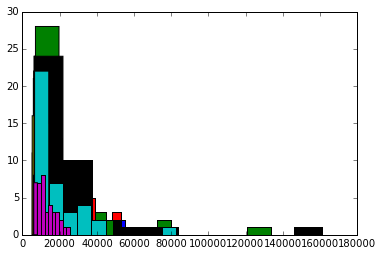

In [23]:
participant_rt(pList,0)

In [24]:
def make_rt_sample(pList):
    # make the first subject to establish the df-structure
    df = participant_rt(pList,0)
    df.index = [["p001"]*len(df), df.index ]
    
    # make the rest of the sample
    for i in range(2,len(pList))[::2]:
        this_df = participant_rt(pList,i)
        # get the naming of the subject right
        thisName = "00"+str(i/2+1)
        this_df.index = [ ["p"+thisName[-3:] ]*len(this_df), this_df.index ]
        # add this subject to sample-df
        df = pd.concat([df,this_df])
    # finalising the df
    df.index.names = ['participant','grade']
    df.columns = ['mouth','eyes','whole']
    return df

mouth                                                          \
grade          _00_    _01_    _02_    _03_    _04_    _05_    _06_    _07_   
participant                                                                   
p001         1420.5  1523.4  1374.2  1663.6  1183.5  1162.1  1513.5  1279.6   
p002         1847.2  1449.9  1271.7  1425.5  1212.3  1779.9  1377.9  1513.8   
p003         1476.3  1329.5  1289.1  1479.6  1504.4  1319.4  1576.6  1333.0   
p004          756.7   739.8   722.0   802.5   835.8   765.4   852.2   705.9   
p005         1175.6  1012.2  1586.3  1278.9  1380.6  1349.2  1486.4  1264.7   
p006         1546.9  1240.0  1634.2  1842.3  1404.6  1476.8  1631.7  1690.8   
p007         1132.6  1218.7  1298.8  1092.1  1135.6  1159.7  1100.9  1005.4   
p008          877.1   884.4   805.0   799.6   804.5   952.8   819.3   824.6   
p009         1279.7  1565.0  1415.6  1600.5  2276.4  2462.1  1995.5  1763.8   
p010         1198.9   890.4   912.1   887.1  1055.7   851.5   881.3   918.2   
p011         1403.9  1691.6  1450.3  1877.8  1772.6  1483.1  1522.4  1140.3   
p012         1343.3  1318.2  1543.8  1274.0  1605.2  1238.9  1319.4  1171.9   
p013         1133.3  1384.3  1223.8  1256.7  1356.4  1269.5  1101.9  1215.6   
p014         1906.7  2190.1  1979.2  1834.3  2002.7  2051.1  2020.4  1557.3   
p015         1134.2  1150.9   943.1  1109.1  1047.7   945.7  1018.3   978.3   
p016         1265.4  1187.0  1255.7  1068.2  1103.9   991.7  1282.3   987.3   
p017          819.5   722.8  1021.8   832.7   825.1   946.6   842.7   863.7   
p018          549.1   510.9   599.7   537.6   601.8   523.9   618.6   634.9   
p019         1103.8  1600.4  1364.2  1368.2  1567.6  1692.2  1122.3  1139.8   
p020          905.8   808.0   887.7   862.3   903.6   879.4   961.5   791.9   
p021         1321.4  1108.2  1224.2  1227.3  1386.7  1435.6  1353.7  1585.5   
p022         1427.0  1305.8  1205.1  1361.0  1461.9  1313.3  1425.5  1181.7   
p023         2070.2  1930.1  1888.2  1882.0  2329.5  1957.8  2046.5  1967.1   
p024         1230.8  1183.6  1293.5  1233.8  1385.8  1171.0  1547.3  1310.5   
p025          998.1  1024.7  1072.8  1028.9  1199.2   983.7  1028.4  1044.0   
p026         1266.7  1351.7  1300.3  1187.9  1169.2  1159.3  1182.2  1337.2   
p027         1273.6  1195.3  1285.0  1007.6  1276.9  1183.6  1059.5   954.1   
p028         1285.3  1368.5  1479.7  1541.1  1481.0  1594.9  1403.1  1578.6   
p029         2201.4  2532.7  2143.2  2175.6  2122.8  2331.5  2367.6  2337.7   
p030          812.4   784.5   884.4   756.1   871.7   756.6   986.8   867.1   

                                       eyes                                  \
grade          _08_    _09_    _10_    _00_    _01_    _02_    _03_    _04_   
participant                                                                   
p001         1099.5  1241.9  1163.2  1224.4  1244.4  1114.7  1148.2  1300.6   
p002         1273.6  1462.6  1106.3  1287.6  1071.4  1314.1  1675.1  1524.8   
p003         1516.5  1316.3  1055.6  1476.9  1572.0  1526.9  1121.4  1300.6   
p004          748.0   681.7   826.7   831.6   767.6   786.5   815.5   805.9   
p005         1628.1  1475.1  1650.0  1041.4  1180.9  1377.5  1063.5  1328.6   
p006         1611.9  1434.5  1474.0   911.7   985.2  1160.7  1211.1  1452.7   
p007         1148.7   996.8   829.6   981.2   962.7   957.6   936.2  1018.0   
p008          708.1   693.1   819.4   674.9   724.0   770.1   691.9   857.4   
p009         2359.7  1634.9  1559.6  1060.4  1311.1  1121.4  1214.6  1561.7   
p010          860.1   833.4   914.6   862.4   775.6   935.7   982.2   908.8   
p011         1193.6  1017.8  1042.2   873.9   873.8  1027.3  1447.6  1250.8   
p012         1073.9  1026.9  1008.0  1388.5  1355.2  2919.3  2331.0  1817.4   
p013         1121.2  1111.9  1130.0   994.1  1115.6   963.0  1039.6  1457.3   
p014         1552.1  1678.4  1644.8  1702.1  2145.0  1668.2  1962.3  2351.3   
p015         1194.6  1002.2   930.5  1137.9  1343.6  1163.5  11

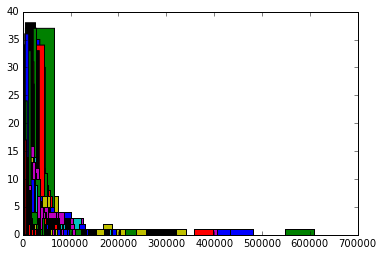

In [25]:
rt_between = make_rt_sample(pList).unstack('grade')
rt_between

Excluding the non-compliant participants:

In [26]:
rev_rt_between = pd.concat([rt_between[0:16], rt_between[18:] ])

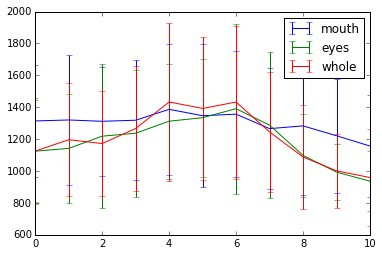

In [27]:
for cond in rev_rt_between.columns.levels[0]:
    errorbar(range(len(rev_rt_between[cond].mean())),
             rev_rt_between[cond].mean(),
             rev_rt_between[cond].std(),
             label=cond)
legend(loc='best')
show()

In [28]:
# save table with all 30 subjects
savePandas(my_folder,rt_between,'Exp1RtMedian.txt')
# save revised table with 28 subjects
savePandas(my_folder,rev_rt_between,'Exp1RtMedianAll.txt')